# 05 Statistics

In [1]:
from typing import List

In [2]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,
               15,15,15,14,14,13,13,13,13,12,12,11,10,10,
               10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,
               9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,
               8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,
               7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,
               3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,
               2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1,1,1,1]

put the friend counts into a histogram using `Counter` and `plt.bar`

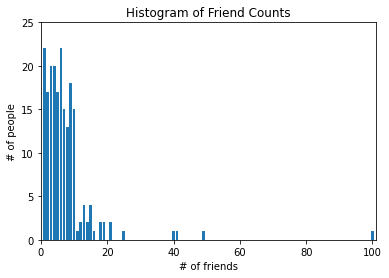

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
xs = range(0, 101)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()


In [4]:
# generate some statistics

In [5]:
num_points = len(num_friends)
num_points

204

In [6]:
largest_value = max(num_friends)
smallest_value = min(num_friends)

print(largest_value)
print(smallest_value)

100.0
1


In [7]:
# value sin specific positions
sorted_values = sorted(num_friends)
smalles_value = sorted_values[0]
second_smalles_value = sorted_values[1]
second_largest_value = sorted_values[-2]

## Central tendencies

In [8]:
# the mean
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)

7.333333333333333

In [9]:
# the median
# underscores indicate that these are "private" functions,
# as they're intended to be called by out median function but
# not by other people using our statistics library
def __median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]


def __median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2


def median(v: List[float]) -> float:
    """Finds the middle-most value of v"""
    return __median_even(v) if len(v) % 2 == 0 else __median_odd(v)


assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [10]:
print(
    median(num_friends)
)

6.0


In [11]:
# a generalization of the median is the quantile, which represents
# the value under which a certain percentile of the data lies
def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

In [12]:
# mode: most common value(s)
def mode(x: List[float]) -> List[float]:
    """Returns a list, since ther emight be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [
        x_i for x_i, count in counts.items() if count == max_count
    ]

assert set(mode(num_friends)) == {1, 6}

## Dispersion

Dispersion refers to measures of how spread out our data is. Typically they’re statistics for which values near zero signify not spread out at all and for which large values (whatever that means) signify very spread out. For instance, a very simple measure is the range, which is just the difference between the largest and smallest elements:


In [13]:
# "range" already means something in python, so we'll use a different
# name
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99

In [18]:
from chapter04.linearalg import sum_of_squares


def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]


def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires al least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55

Now, whatever units our data is in (e.g., “friends”), all of our measures of central tendency are in that same unit. The range will similarly be in that same unit. The variance, on the other hand, has units that are the square of the original units (e.g., “friends squared”). As it can be hard to make sense of these, we often look instead at the standard deviation:

In [20]:
import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

Both the range and the standard deviation have the same outlier problem that we saw earlier for the mean. Using the same example, if our friendliest user had instead 200 friends, the standard deviation would be 14.89—more than 60% higher!

A more robust alternative computes the difference between the 75th percentile value and the 25th percentile value:

In [22]:
def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 3rd quartile and the 2 quartile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 6

## Correlation

We’ll first look at covariance, the paired analogue of variance. Whereas variance measures how a single variable deviates from its mean, covariance measures how two variables vary in tandem from their means:

In [26]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,
                 41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,
                 41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,
                 26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,
                 21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,
                 21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,
                 46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,
                 30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,
                 28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,
                 19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,
                 24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,
                 34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,
                 44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,
                 40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,
                 18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,
                 33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,
                 24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,
                 28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,
                 26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,
                 32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,
                 29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,
                 24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,
                 31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,
                 17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,
                 31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]


daily_hours = [dm / 60 for dm in daily_minutes]

In [27]:
from chapter04.linearalg import dot

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), 'xs and ys must have hame number of elements'
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

Recall that `dot` sums up the products of corresponding pairs of elements.
When corresponding elements of `x` and `y` are either both above their means
or both belowe their means, a positive number enters the sum. When one is
above its mean and the other below, a negative number enters the sum.
Accordingly, a "large" positive covariance means that `x` tends to be large
when `y` is large and small when `y` is small. A "large" negative covariance
means the opposite -that `x` tends to be small when `y`y is large and vice-versa.
A covariance close to zero means tha tno such relationships exists.

Nonetheless, this number can be hard to interpret, for a couple of reasons:
- Its units are the product of the inputs’ units (e.g., friend-minutes- per-day), which can be hard to make sense of. (What’s a “friend- minute-per-day”?)
- If each user had twice as many friends (but the same number of minutes), the covariance would be twice as large. But in a sense, the variables would be just as interrelated. Said differently, it’s hard to say what counts as a “large” covariance.

For this reason, it’s more common to look at the correlation, which divides out the standard deviations of both variables:

In [29]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0
    

assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

The is unitless and always lies between –1 (perfect anticorrelation) and 1 (perfect correlation). A number like 0.25 represents a relatively weak positive correlation.



The person with 100 friends (who spends only 1 minute per day on the site) is a huge outlier, and correlation can be very sensitive to outliers. What happens if we ignore him?

In [30]:
outlier = num_friends.index(100)    # index of outlier

In [31]:
num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58

## Some Correlational Caveats

A correlation of zero indicates that there is no linear relationship between the two variables. However, there may be other sorts of relationships. For example, if:

In [32]:
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]

then `x` and `y` have zero correlation. But they certainly have a relationship,
each element of `y` equals the absolute value of the corresponding element
of `x`. What they don't have is a relationships in which knowing how `x_i`
compares to `mean(x)` gives us information about how `y_i` compares to
`mean(y)`. That is the sort of relationship that correlation looks for.

In addition, correlation tells you nothing about how large the relationship is.

The variables

In [33]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

re perfectly correlated, but (depending on what you’re measuring) it’s quite possible that this relationship isn’t all that interesting.

## Correlation and Causation

If `x` and `y` are strongly correlated, that might mean that `x`
causes `y`, that `y` causes `x`, that each causes the other,
that some third factor causes both, or nothing at all.

One way to feel more confident about causality is by conducting randomized trials. If you can randomly split your users into two groups with similar demographics and give one of the groups a slightly different experience, then you can often feel pretty good that the different experiences are causing the different outcomes.